##**TUGAS PRAKTIKUM 5**
Nama : Rafi Fadhlillah<br>
NIM : 121450143

#LATIHAN

Perhatikan gambar di bawah ini: 

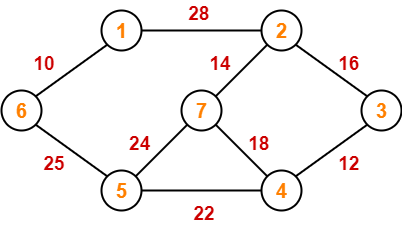

Implementasikan algoritma Prim's, algoritma Kruskal, dan algoritma Djikstra dalam pencarian rute minimumnya. Lalu lakukan analisis perbandingan dari ketiga hasil tersebut.

##Cara 1 Algoritma Djikstra

In [ ]:
infinity = float('infinity')
mulai = '6'
berhenti = '3'

lokasi = {
    '1':{'6': 10,'2': 28},
    '2':{'1': 28,'3': 16,'7': 14},
    '3':{'2': 16,'4': 12},
    '4':{'3': 12,'5': 22,'7': 18},
    '5':{'4': 22,'6': 25,'7': 24},
    '6':{'1': 10,'5': 25},
    '7':{'2': 14,'4': 18,'5': 24}
    
}

In [ ]:
distance = {}   # distance = jarak yang perlu ditempuh
city= {}    # city = data lokasi
for node in lokasi: # looping data pendefinisian lokasi
  distance[node] = infinity # inisialisasi dist dengan nilai infinity (anggapannya node ini belum dikunjungi)
  city[node] = {} # inisialisasi parent tanpa node{}

distance[mulai] = 0 # atur jarak pertama dengan nilai 0

def find_cheapest_node(distance,not_checked):
  lowest_dist = infinity
  cheapest_node = ''
  for node in distance:
    if node in not_checked and distance[node] <= lowest_dist:
      lowest_dist = distance[node]
      cheapest_node = node
  return cheapest_node

In [ ]:
not_checked = [node for node in distance]
node = find_cheapest_node(distance, not_checked)

while not_checked:
  dist = distance[node]
  child_dist = lokasi[node]
  for c in child_dist:
    if distance[c] > dist + child_dist[c]:
      distance[c] = dist + child_dist[c]
      city[c] = node
  
  not_checked.pop(not_checked.index(node))
  node = find_cheapest_node(distance, not_checked)

print(' ')
print(f'Jarak tempuh terpendek dari {mulai} ke {berhenti} sejauh {distance[berhenti]} km!')

if distance[berhenti] < infinity:
  rute = [berhenti]
  
  i = 0
  while mulai not in rute:
    rute.append(city[rute[i]])
    i += 1
  
  barrier = '>'
  print(barrier*50)
  print(f'Rutenya adalah {rute[::-1]}')

else:
  print('Rute tidak dapat ditemukan')

 
Jarak tempuh terpendek dari 6 ke 3 sejauh 54 km!
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Rutenya adalah ['6', '1', '2', '3']


##Cara 2 Algoritma Djikstra

In [ ]:
import networkx as nx

In [ ]:
class Graph:
  def __init__(self, graph):
    self.G = nx.Graph()
    self.graph = graph
    self.nodes = list(graph.keys())

  def addEdges(self, a, b, weight):
    self.G.add_edge(a, b, weight=weight)

In [ ]:
def get_path_weight(path):
  path_weight = 0

  for index, value in enumerate(path):
    try:
      for j in graph[value]:
        if j['v'] == path[index + 1]:
          path_weight += j['w']
    except:
      break
  return path_weight

In [ ]:
def find_shortest_path(graph, start, end, path=[]):
  path = path + [start]
  shortest = None
  weights = None

  if start == end: return path

  for node in graph[start]:
    if node['v'] not in path:
      newpath = find_shortest_path(graph, node['v'], end, path)
      if newpath:
        new_wexight = get_path_weight(newpath)
        if not weights or new_wexight < weights:
          shortest = newpath
          weights = new_wexight

  return shortest

In [ ]:
graph = {
    '1': [{'v': '2','w': 28}, {'v': '6','w':10}],
    '2': [{'v': '7','w': 14}, {'v': '3','w':16}, {'v': '1','w':28}],
    '3': [{'v': '2','w': 16}, {'v': '4','w':12}],
    '4': [{'v': '3','w': 12}, {'v': '5','w':22}, {'v': '7','w':18}],
    '5': [{'v': '7','w': 24}, {'v': '4','w':22}, {'v': '6','w':25}],
    '6': [{'v': '1','w': 10}, {'v': '5','w':25}],
    '7': [{'v': '2','w': 14}, {'v': '4','w':18}, {'v': '5','w':24}],
}

In [ ]:
shortest_path = find_shortest_path(graph, '6', '3')
weight_shortest_path = get_path_weight(shortest_path)

print('Shortest Path :', shortest_path)
print('Weight :', weight_shortest_path)

Shortest Path : ['6', '1', '2', '3']
Weight : 54


##Cara 3 Algoritma Djikstra

In [ ]:
# Library for INT_MAX
import sys
 
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = sys.maxsize
 
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                        dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]
 
        self.printSolution(dist)
 
 
# Driver's code
if __name__ == "__main__":
    g = Graph(7)
    g.graph = [[0, 28, 0, 0, 0, 10, 0],
               [28, 0, 16, 0, 0, 0, 14],
               [0, 16, 0, 12, 0, 0, 0],
               [0, 0, 12, 0, 22, 0, 18],
               [0, 0, 0, 22, 0, 25, 24],
               [10, 0, 0, 0, 25, 0, 0],
               [0, 14, 0, 18, 14, 0, 0]
               ]
 
    g.dijkstra(0)

Vertex 	Distance from Source
0 	 0
1 	 28
2 	 44
3 	 56
4 	 35
5 	 10
6 	 42


##Prim's Algorithm

In [ ]:
class Graph:
    def __init__(self, num_of_nodes):
        self.m_num_of_nodes = num_of_nodes
        # Inisialisasi matriks adjacency dengan nol
        self.m_graph = [[0 for column in range(num_of_nodes)] 
                    for row in range(num_of_nodes)]

    # Fungsi menambahkan edge sisi dengan weight
    def add_edge(self, node1, node2, weight):
        self.m_graph[node1][node2] = weight
        self.m_graph[node2][node1] = weight
    def prims_mst(self):
        # Mendefinisikan bilangan yang benar-benar besar yang akan selalu menjadi jarak tertinggi dimanapun posisinya
        postitive_inf = float('inf')

        # This is a list showing which nodes are already selected 
        # so we don't pick the same node twice and we can actually know when stop looking
        selected_nodes = [False for node in range(self.m_num_of_nodes)]

        # Matriks dari hasil MST 
        result = [[0 for column in range(self.m_num_of_nodes)] 
                    for row in range(self.m_num_of_nodes)]
        
        indx = 0
        for i in range(self.m_num_of_nodes):
            print(self.m_graph[i])
        
        print(selected_nodes)

        # While there are nodes that are not included in the MST, keep looking:
        while(False in selected_nodes):
            # We use the big number we created before as the possible minimum weight
            minimum = postitive_inf

            # TItik Memulai Node 
            start = 0

            # Titik akhir node 
            end = 0

            for i in range(self.m_num_of_nodes):
                # If the node is part of the MST, look its relationships
                if selected_nodes[i]:
                    for j in range(self.m_num_of_nodes):
                        # If the analyzed node have a path to the ending node AND its not included in the MST (to avoid cycles)
                        if (not selected_nodes[j] and self.m_graph[i][j]>0):  
                            # If the weight path analized is less than the minimum of the MST
                            if self.m_graph[i][j] < minimum:
                                # Defines the new minimum weight, the starting vertex and the ending vertex
                                minimum = self.m_graph[i][j]
                                start, end = i, j
            
            # Since we added the ending vertex to the MST, it's already selected:
            selected_nodes[end] = True

            # Filling the MST Adjacency Matrix fields:
            result[start][end] = minimum
            
            if minimum == postitive_inf:
                result[start][end] = 0

            print("(%d.) %d - %d: %d" % (indx, start, end, result[start][end]))
            indx += 1
            
            result[end][start] = result[start][end]

        # Print the resulting MST
        # for node1, node2, weight in result:
        for i in range(len(result)):
            for j in range(0+i, len(result)):
                if result[i][j] != 0:
                    print("%d - %d: %d" % (i, j, result[i][j]))

In [ ]:
# 7 nodes graph

example_graph = Graph(7)

example_graph.add_edge(0, 1, 28)
example_graph.add_edge(0, 5, 10)
example_graph.add_edge(1, 0, 28)
example_graph.add_edge(5, 0, 10)
example_graph.add_edge(1, 2, 16)
example_graph.add_edge(1, 6, 14)
example_graph.add_edge(2, 1, 16)
example_graph.add_edge(6, 1, 14)
example_graph.add_edge(2, 3, 12)
example_graph.add_edge(3, 2, 12)
example_graph.add_edge(6, 3, 18)
example_graph.add_edge(3, 6, 18)
example_graph.add_edge(3, 4, 22)
example_graph.add_edge(4, 3, 22)
example_graph.add_edge(4, 6, 24)
example_graph.add_edge(6, 4, 24)
example_graph.add_edge(4, 5, 25)
example_graph.add_edge(5, 4, 25)

In [ ]:
example_graph.prims_mst()

[0, 28, 0, 0, 0, 10, 0]
[28, 0, 16, 0, 0, 0, 14]
[0, 16, 0, 12, 0, 0, 0]
[0, 0, 12, 0, 22, 0, 18]
[0, 0, 0, 22, 0, 25, 24]
[10, 0, 0, 0, 25, 0, 0]
[0, 14, 0, 18, 24, 0, 0]
[False, False, False, False, False, False, False]
(0.) 0 - 0: 0
(1.) 0 - 5: 10
(2.) 5 - 4: 25
(3.) 4 - 3: 22
(4.) 3 - 2: 12
(5.) 2 - 1: 16
(6.) 1 - 6: 14
0 - 5: 10
1 - 2: 16
1 - 6: 14
2 - 3: 12
3 - 4: 22
4 - 5: 25


##Kruskal Algorithm

In [ ]:
class Graph:
    def __init__(self, num_of_nodes):
        self.m_num_of_nodes = num_of_nodes
        # Inisialisasi matriks adjacency dengan nol
        self.m_graph = [[0 for column in range(num_of_nodes)] 
                    for row in range(num_of_nodes)]

    def add_edge(self, node1, node2, weight):
        self.m_graph[node1][node2] = weight
        self.m_graph[node2][node1] = weight
    def prims_mst(self):
        # Defining a really big number, that'll always be the highest weight in comparisons
        postitive_inf = float('inf')

        # This is a list showing which nodes are already selected 
        # so we don't pick the same node twice and we can actually know when stop looking
        selected_nodes = [False for node in range(self.m_num_of_nodes)]

        # Matrix of the resulting MST
        result = [[0 for column in range(self.m_num_of_nodes)] 
                    for row in range(self.m_num_of_nodes)]
        
        indx = 0
        for i in range(self.m_num_of_nodes):
            print(self.m_graph[i])
        
        print(selected_nodes)

        # While there are nodes that are not included in the MST, keep looking:
        while(False in selected_nodes):
            # We use the big number we created before as the possible minimum weight
            minimum = postitive_inf

            # The starting node
            start = 0

            # The ending node
            end = 0

            for i in range(self.m_num_of_nodes):
                # If the node is part of the MST, look its relationships
                if selected_nodes[i]:
                    for j in range(self.m_num_of_nodes):
                        # If the analyzed node have a path to the ending node AND its not included in the MST (to avoid cycles)
                        if (not selected_nodes[j] and self.m_graph[i][j]>0):  
                            # If the weight path analized is less than the minimum of the MST
                            if self.m_graph[i][j] < minimum:
                                # Defines the new minimum weight, the starting vertex and the ending vertex
                                minimum = self.m_graph[i][j]
                                start, end = i, j
            
            # Since we added the ending vertex to the MST, it's already selected:
            selected_nodes[end] = True

            # Filling the MST Adjacency Matrix fields:
            result[start][end] = minimum
            
            if minimum == postitive_inf:
                result[start][end] = 0

            print("(%d.) %d - %d: %d" % (indx, start, end, result[start][end]))
            indx += 1
            
            result[end][start] = result[start][end]

        # Print the resulting MST
        # for node1, node2, weight in result:
        for i in range(len(result)):
            for j in range(0+i, len(result)):
                if result[i][j] != 0:
                    print("%d - %d: %d" % (i, j, result[i][j]))


# Kruskal's algorithm in Python
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Search function

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    #  Applying Kruskal algorithm
    def kruskal_algo(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        for u, v, weight in result:
            print("%d - %d: %d" % (u, v, weight))

In [ ]:
g = Graph(7)
g.add_edge(0, 1, 28)
g.add_edge(0, 5, 10)
g.add_edge(1, 0, 28)
g.add_edge(5, 0, 10)
g.add_edge(1, 2, 16)
g.add_edge(1, 6, 14)
g.add_edge(2, 1, 16)
g.add_edge(6, 1, 14)
g.add_edge(2, 3, 12)
g.add_edge(3, 2, 12)
g.add_edge(6, 3, 18)
g.add_edge(3, 6, 18)
g.add_edge(3, 4, 22)
g.add_edge(4, 3, 22)
g.add_edge(4, 6, 24)
g.add_edge(6, 4, 24)
g.add_edge(4, 5, 25)
g.add_edge(5, 4, 25)

g.kruskal_algo()

0 - 5: 10
2 - 3: 12
1 - 6: 14
1 - 2: 16
3 - 4: 22
4 - 5: 25


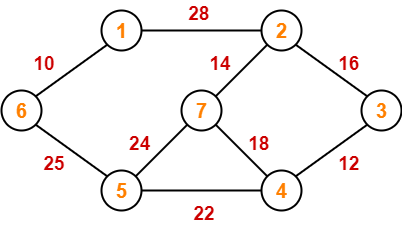

##Analisis
- Pada Algoritma Djikstra di dalamnya terdapat code untuk menentukan titik awal dan titik akhir pada code diatas saya mengambil titik awalnya dari 6 dan titik akhir di 3, kemudian ketika code tereksekusi maka akan mencari jarak terpendek dengan nilai paling rendah misalkan pada code diatas hasil jarak terpendeknya adalah 6 > 1 > 2 > 3 dengan panjang rute 54 km. penjelasannya ialah pertama pada titik 6 terdapat 2 pilihan yakni bisa ke 1(10) atau ke 5(25). Karena 10 < 5 maka kita ambil rute dari 6 ke 1 kemudian dari 1 tidak ada piliha lain selain ke 2(28) ketika di titik 2 terdapat 2 pilihan bisa ke 7 atau langsung ke titik akhir 3 maka algoritma akan memilih langsung ke 3(16) karena itu merupakan rute terpendeknya sehinggan didapatkan rute terpendek 6 > 1 > 2 > 3 dengan jaraknya sebesar 10 + 28 + 16 = 54

- Algoritma prim dan kruskal merupakan kedua jenis algoritma yang dapat digunakan untuk
mencari minimum spanning tree (MST) pada sebuah graf. Dalam pencarian MST di sebuah graf,
algoritma prim berorientasi pada titik atau vertex graf, sedangkan algoritma kruskal berorientasi
pada bobot (weight) sisi graf. Walaupun perbedaan orientasi namun kedua algoritma tersebut
mampu memberikan solusi yang sama. Algoritma prim mempunyai kompleksitas waktu (worst
case) O(E Log V), sedangkan algoritma kruskal O( E Log E) dan O(E Log V). Kompleksitas
waktu tersebut sangat berpengaruh pada kecepatan waktu eksekusi atau running time dalam
menjalankan algoritma proses pencarian MST, dimana algoritma prim akan mempunyai running
time tercepat ketika kompleksitas graf rumit sedangkan algoritma kruskal akan lebih cepat jika
kompleksitas graf sederhana.